In [2]:
import numpy as np
import pandas as pd
import datetime
import os


In [3]:
# read the file 

df_opt = pd.read_csv('GFDLNFO_BACKADJUSTED_30112023.csv')

In [4]:
df_opt

,Ticker,Date,Time,Open,High,Low,Close,Volume,Open Interest
0,AARTIIND25JAN24500PE.NFO,30/11/2023,09:53:59,8.00,8.00,8.00,8.00,1000,4000
1,AARTIIND25JAN24500PE.NFO,30/11/2023,10:40:59,7.00,7.00,7.00,7.00,1000,5000
2,AARTIIND25JAN24500PE.NFO,30/11/2023,10:41:59,7.00,7.00,7.00,7.00,1000,5000
3,AARTIIND25JAN24500PE.NFO,30/11/2023,11:25:59,6.85,6.85,6.85,6.85,1000,5000
4,AARTIIND25JAN24500PE.NFO,30/11/2023,11:26:59,6.85,6.85,6.85,6.85,1000,5000
...,...,...,...,...,...,...,...,...,...
1317752,ZYDUSLIFE-III.NFO,30/11/2023,12:22:59,647.55,647.55,645.55,645.55,900,73800
1317753,ZYDUSLIFE-III.NFO,30/11/2023,12:45:59,645.55,645.55,644.50,644.50,900,74700
1317754,ZYDUSLIFE-III.NFO,30/11/2023,13:53:59,644.50,648.00,644.50,648.00,900,75600
1317755,ZYDUSLIFE-III.NFO,30/11/2023,14:08:59,648.00,648.00,648.00,648.00,900,74700


In [5]:

def format_data(opt_df):
    opt_df = opt_df[opt_df['Ticker'].str.startswith('NIFTY')]
    opt_df = opt_df[(opt_df['Ticker'].str.contains('PE')) | (opt_df['Ticker'].str.contains('CE'))]
    opt_df['expiry_date'] = opt_df['Ticker'].apply(lambda x: x[5:12])
    opt_df['option_type'] = opt_df['Ticker'].apply(lambda x: x[-6:-4])
    opt_df['strike'] = opt_df['Ticker'].apply(lambda x: x[12:-6]).astype(int)
    opt_df['expiry_date'] = pd.to_datetime(opt_df['expiry_date'])
    exp_dates = list(opt_df['expiry_date'].unique())
    exp_dates.sort()
    opt_df = opt_df[opt_df['expiry_date'] == exp_dates[0]]
    opt_df = opt_df[['Time','Ticker','option_type','strike','expiry_date','Close','Open Interest']]
    opt_df = opt_df.reset_index()
    opt_df = opt_df.drop('index', axis=1)
    opt_df['Time'] = pd.to_datetime(opt_df['Time'])
    opt_df['Time'] = opt_df['Time'].dt.strftime('%H:%M')
    opt_df['Time'] = pd.to_datetime(opt_df['Time'])
    opt_df['Time'] = opt_df['Time'].dt.time
    return opt_df


In [8]:
df_opt = format_data(opt_df=df_opt)

C:\Users\gaura\AppData\Local\Temp\ipykernel_21548\3541395.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  opt_df['expiry_date'] = pd.to_datetime(opt_df['expiry_date'])
C:\Users\gaura\AppData\Local\Temp\ipykernel_21548\3541395.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  opt_df['Time'] = pd.to_datetime(opt_df['Time'])
C:\Users\gaura\AppData\Local\Temp\ipykernel_21548\3541395.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  opt_df['Time'] = pd.to_datetime(opt_df['Time'])


In [18]:
df_opt['expiry_date'] = df_opt['expiry_date'].dt.date

In [19]:
df_opt_ce = df_opt[df_opt['option_type'] == 'CE']
df_opt_pe = df_opt[df_opt['option_type'] == 'PE']

In [32]:
import datetime

def calculate_years_between_dates(date1, time1, date2, time2):
    datetime1 = datetime.datetime.strptime(date1 + ' ' + time1, '%Y-%m-%d %H:%M:%S')
    datetime2 = datetime.datetime.strptime(date2 + ' ' + time2, '%Y-%m-%d %H:%M:%S')
    time_difference_seconds = (datetime2 - datetime1).total_seconds()
    years_difference = time_difference_seconds / (365.25 * 24 * 60 * 60)
    return round(years_difference,6)
result = calculate_years_between_dates(date1, time1, date2, time2)


In [20]:
# filtering a time for a dataframe

df_use = df_opt_ce[df_opt_ce['Time'] == datetime.time(12,0)]

In [22]:
df_use.sort_values('strike', inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_21548\3986613440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use.sort_values('strike', inplace=True)


In [34]:
_td = calculate_years_between_dates('2023-11-30', '12:00:00', '2023-11-30', '15:30:00')

In [25]:
str(df_use['expiry_date'].iloc[0])

'2023-11-30'

In [26]:
str(datetime.time(12,0))

'12:00:00'

In [35]:
df_use['rem_time'] = _td

C:\Users\gaura\AppData\Local\Temp\ipykernel_21548\3416746091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['rem_time'] = _td


In [38]:
spot_price = 20069.15

In [41]:
df_use.head()

,Time,Ticker,option_type,strike,expiry_date,Close,Open Interest,rem_time
3204,12:00:00,NIFTY30NOV2318000CE.NFO,CE,18000,2023-11-30,2072.0,1088600,0.000399
5992,12:00:00,NIFTY30NOV2318500CE.NFO,CE,18500,2023-11-30,1569.0,478400,0.000399
8147,12:00:00,NIFTY30NOV2318800CE.NFO,CE,18800,2023-11-30,1270.0,248050,0.000399
9030,12:00:00,NIFTY30NOV2318900CE.NFO,CE,18900,2023-11-30,1169.1,474300,0.000399
10085,12:00:00,NIFTY30NOV2319000CE.NFO,CE,19000,2023-11-30,1071.0,878250,0.000399


In [42]:
df_use['IV'] = 0

C:\Users\gaura\AppData\Local\Temp\ipykernel_21548\1557291816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['IV'] = 0


In [44]:
for i in range(len(df_use)):
    try:

        _iv = implied_volatility(df_use['Close'].iloc[i], spot_price,df_use['strike'].iloc[i], 0.000399, 0.1, 'c')
        df_use.iloc[i,-1] = _iv
        
    except:
        pass

In [51]:
df_use = df_use[df_use['IV'] != 0]

In [54]:
df_use_filt = df_use[['strike','IV']]

In [55]:
df_use_filt.set_index('strike', inplace=True)

<Axes: xlabel='strike'>

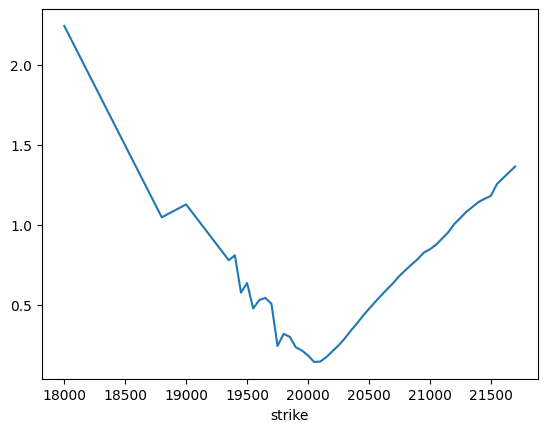

In [56]:
df_use_filt['IV'].plot()

In [57]:
df_use

,Time,Ticker,option_type,strike,expiry_date,Close,Open Interest,rem_time,IV
3204,12:00:00,NIFTY30NOV2318000CE.NFO,CE,18000,2023-11-30,2072.00,1088600,0.000399,2.244717
8147,12:00:00,NIFTY30NOV2318800CE.NFO,CE,18800,2023-11-30,1270.00,248050,0.000399,1.047810
10085,12:00:00,NIFTY30NOV2319000CE.NFO,CE,19000,2023-11-30,1071.00,878250,0.000399,1.128456
13950,12:00:00,NIFTY30NOV2319350CE.NFO,CE,19350,2023-11-30,720.90,42050,0.000399,0.779252
14545,12:00:00,NIFTY30NOV2319400CE.NFO,CE,19400,2023-11-30,672.00,394150,0.000399,0.810089
15151,12:00:00,NIFTY30NOV2319450CE.NFO,CE,19450,2023-11-30,620.15,225750,0.000399,0.576905
15781,12:00:00,NIFTY30NOV2319500CE.NFO,CE,19500,2023-11-30,570.95,1031100,0.000399,0.636906
16462,12:00:00,NIFTY30NOV2319550CE.NFO,CE,19550,2023-11-30,520.10,56300,0.000399,0.477833
17109,12:00:00,NIFTY30NOV2319600CE.NFO,CE,19600,2023-11-30,470.85,471900,0.000399,0.529833
17825,12:00:00,NIFTY30NOV2319650CE.NFO,CE,19650,2023-11-30,422.05,147250,0.000399,0.544055


In [37]:
from py_vollib.black_scholes import black_scholes
from py_vollib.black_scholes.implied_volatility import implied_volatility

In [39]:
implied_vol = implied_volatility(76.65, spot_price,20000 , 0.000399, 0.1, 'c')

In [40]:
implied_vol

0.18360429238791923